 Assignment Tasks:
 
 
Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per
insight).


Deliverables:


● A Jupyter Notebook/Python script containing your EDA code.
● A PDF report with business insights (maximum 500 words).

# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and preprocess data

In [3]:
data = pd.read_csv(r"Customers.csv")

In [7]:
data

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
data.size

800

In [10]:
data.iloc[0]

CustomerID                 C0001
CustomerName    Lawrence Carroll
Region             South America
SignupDate            2022-07-10
Name: 0, dtype: object

In [13]:
data.shape

(200, 4)

# Check for missing values

In [14]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


# Get basic statistics for the dataset

In [15]:
summary_stats = data.describe(include='all')


In [16]:
summary_stats

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [17]:
missing_values, summary_stats

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
        CustomerID      CustomerName         Region  SignupDate
 count         200               200            200         200
 unique        200               200              4         179
 top         C0001  Lawrence Carroll  South America  2024-11-11
 freq            1                 1             59           3)

In [18]:
# Convert 'SignupDate' to datetime format

data['SignupDate'] = pd.to_datetime(data['SignupDate'])


In [19]:
# Add columns for analysis: Signup Month and Quarter
data['SignupMonth'] = data['SignupDate'].dt.to_period('M')
data['SignupQuarter'] = data['SignupDate'].dt.to_period('Q')

# Regional Distribution




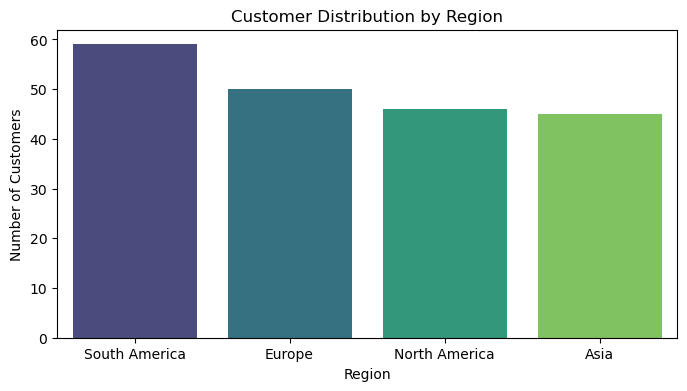

In [20]:
region_counts = data['Region'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Monthly Signup Trends

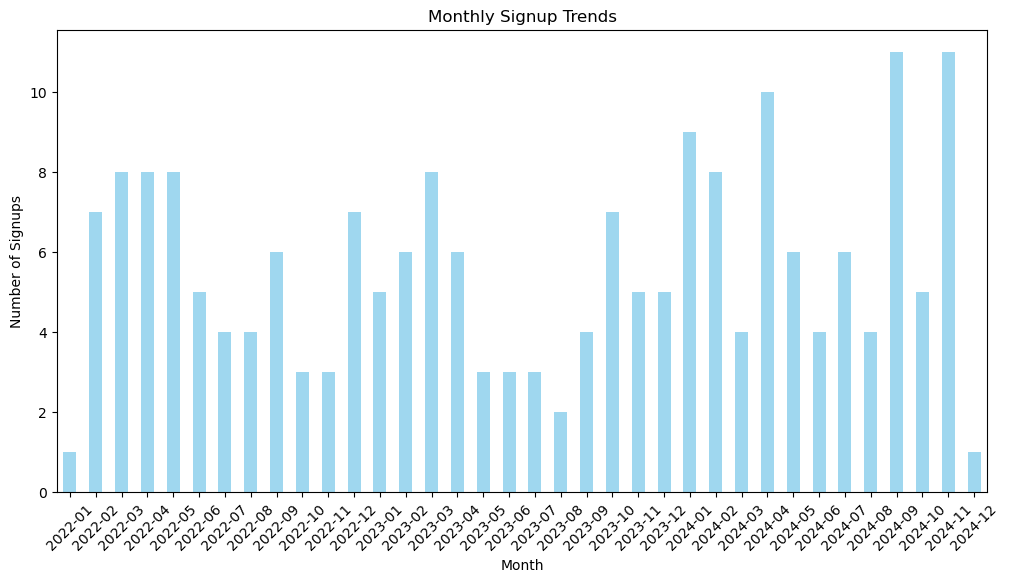

In [21]:
monthly_trends = data['SignupMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Monthly Signup Trends")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

# Quarterly Signup Trends

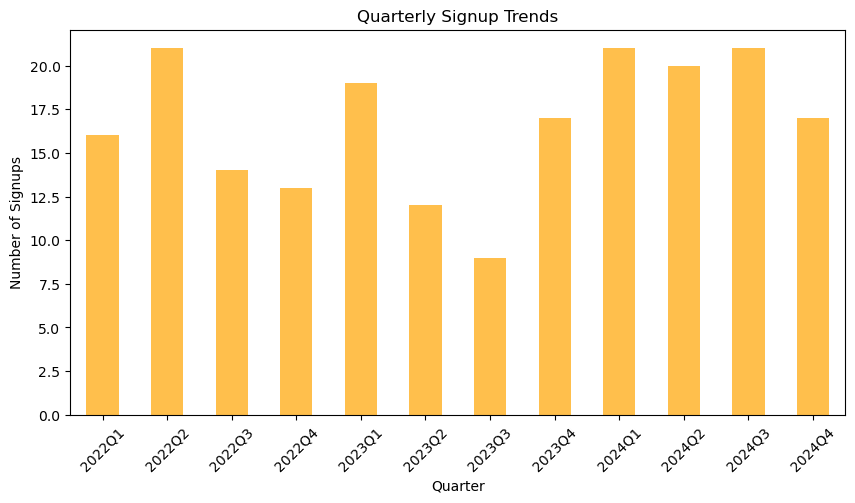

In [22]:
quarterly_trends = data['SignupQuarter'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
quarterly_trends.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Quarterly Signup Trends")
plt.xlabel("Quarter")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

# Signup Trends by Region Over Time

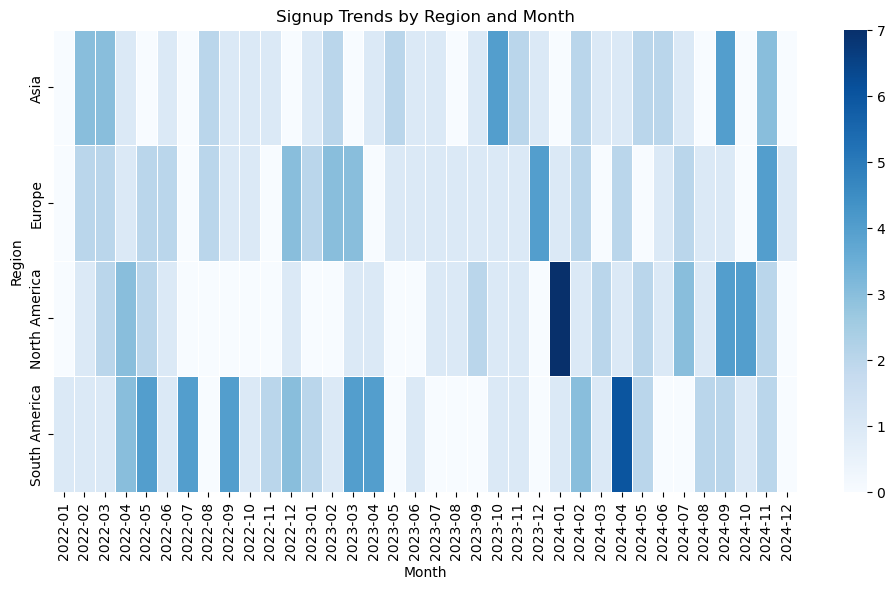

In [23]:
region_month_trends = data.groupby(['Region', 'SignupMonth']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(region_month_trends, cmap='Blues', linewidths=0.5, linecolor='white', annot=False)
plt.title("Signup Trends by Region and Month")
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()


In [24]:
# Output Key Statistics
print("\nRegional Distribution:\n", region_counts)
print("\nMonthly Signup Trends:\n", monthly_trends.head())
print("\nQuarterly Signup Trends:\n", quarterly_trends)



Regional Distribution:
 South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

Monthly Signup Trends:
 2022-01    1
2022-02    7
2022-03    8
2022-04    8
2022-05    8
Freq: M, Name: SignupMonth, dtype: int64

Quarterly Signup Trends:
 2022Q1    16
2022Q2    21
2022Q3    14
2022Q4    13
2023Q1    19
2023Q2    12
2023Q3     9
2023Q4    17
2024Q1    21
2024Q2    20
2024Q3    21
2024Q4    17
Freq: Q-DEC, Name: SignupQuarter, dtype: int64
